In [86]:
import traceback
import pickle
import regex as re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy.random import choice
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
import json
import pandas as pd


In [87]:
import lzma
#download data from https://archive.org/download/recipes-en-201706/
data = lzma.open(r"allrecipes-recipes.json.xz').read().decode("utf-8") 


In [88]:
recipes = []
for recipe in data.split('\n'):
    try:
        recipes.append(json.loads(recipe))
    except Exception:
        traceback.print_exc()
        
    

Traceback (most recent call last):
  File "<ipython-input-88-7556d27fd19a>", line 4, in <module>
    recipes.append(json.loads(recipe))
  File "C:\Users\keesb\anaconda3\envs\cooking\lib\json\__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "C:\Users\keesb\anaconda3\envs\cooking\lib\json\decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "C:\Users\keesb\anaconda3\envs\cooking\lib\json\decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


# Load data

In [89]:
recipes = pickle.load(open("recipes.p", "rb"))

In [90]:
# hand picketd adjective to remove to prevent duplicate ingredients
to_remove = ["cup", "cups", "tablespoons", "tablespoon", "teaspoon", "teaspoons", "chopped",
             "sifted", "ounce", "gram", "grams", "pinch", "lbs", "kilo", "pound", "degrees", 
             "f", "c", "warm", "cold", "finely", "large", "small", "medium", "inch", "can", 
             "cans", "package", "packaged" "fresh", "dried", "grated", "divided", "flake", "diced", 
             "crushed", "sliced", "slice", "prepared", "shredded", "half", "or", "to", 
             "taste", "and", "chrushed", "ground", "dash", "black", "freshly", "optional", 
             "coarse", "coarsely", "seeded", "minced", "cut", "into", "strips", "thinly", 
             "piece", "more", "pounded", "green", "red", "yellow", "peeled", "deveined", 
             "cooked", "uncooked", "washed", "clove", "cloves", "pounds", "melted", "oil", "frying",
            "squared", "chunk", "drained", "rinsed", "jar", "frozen", "crumbled", "bulk", "cubed",
            "pitted", "seperated", "beaten", "softened", "slice", "dry", "hot", "cold", "room", "temperature",
            "diet", "storebought", "pieces"]

In [91]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\keesb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [92]:
def clean_ingredient(ingredient, to_remove, lmtzr = None):
    ingredient = re.sub('[^A-Za-z\s]+', '', ingredient)
    ingredient = [word.lower() for word in ingredient.split() if word.lower() not in to_remove]
    if lmtzr is not None:
        ingredient = [lmtzr.lemmatize(word) for word in ingredient]
    ingredient = " ".join(ingredient)
    ingredient = [word.lower() for word in ingredient.split() if word.lower() not in to_remove]
    ingredient = " ".join(ingredient)
    return(ingredient)

In [93]:
all_ingredients = []
lmtzr = WordNetLemmatizer()
for i in range(len(recipes)):
    recipes[i]["cleaned_ingredients"] = [clean_ingredient(ingredient, to_remove, lmtzr) for ingredient in recipes[i]["ingredients"]]
    all_ingredients += recipes[i]["cleaned_ingredients"]   

In [94]:
all_ingredients

['unsalted butter chilled',
 'onion',
 'cornmeal',
 'allpurpose flour',
 'white sugar',
 'baking powder',
 'salt',
 'baking soda',
 'buttermilk',
 'egg',
 'pepperjack cheese',
 'corn kernel thawed',
 'roasted marinated bell pepper',
 'fresh basil',
 'parmesan cheese',
 'pepper',
 'garlic powder',
 'puff pastry thawed',
 'egg white',
 'water',
 'margarine',
 'white sugar',
 'salt',
 'water',
 'active yeast',
 'allpurpose flour',
 'egg',
 'white sugar',
 'vegetable',
 'egg',
 'allpurpose flour',
 'baking soda',
 'salt',
 'cinnamon',
 'nutmeg',
 'water',
 'mashed sweet potato',
 'pecan',
 'butter',
 'white sugar',
 'milk',
 'active yeast',
 'bread flour',
 'white sugar',
 'egg',
 'orange juice',
 'orange zest',
 'salt',
 'active yeast',
 'lukewarm milk',
 'white sugar',
 'unbleached allpurpose flour',
 'salt',
 'butter cooled',
 'allpurpose flour',
 'cheddar cheese',
 'jalapeno pepper',
 'white sugar',
 'salt',
 'water',
 'active yeast',
 'vegetable',
 'active yeast',
 'white sugar',
 'wa

In [95]:
unique_ingredients = set(all_ingredients)
all_ingredients = None

In [96]:
ingredient_dic = {}
unique_ingredients = list(unique_ingredients)
for i in range(len(unique_ingredients)):
    ingredient_dic[unique_ingredients[i]] = {"count" : 0}

In [97]:
for recipe in recipes:
    for i in recipe["cleaned_ingredients"]:
        ingredient_dic[i]["count"] += 1

C:\Users\keesb\anaconda3\envs\cooking\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

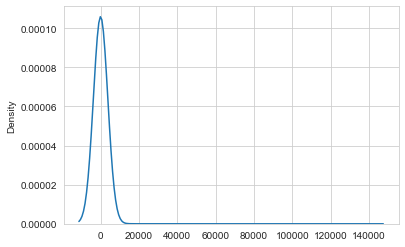

In [98]:
counts = [ingredient_dic[i]["count"] for i in ingredient_dic.keys()]
sns.set_style('whitegrid')
sns.kdeplot(np.array(counts), bw=3)


In [99]:
#keys = ingredient_dic.keys()
for key in list(ingredient_dic):
    if ingredient_dic[key]["count"] < 500:
        del ingredient_dic[key]


In [100]:
len(ingredient_dic)

202

<AxesSubplot:ylabel='Density'>

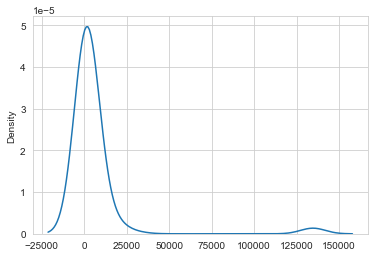

In [101]:
counts = [ingredient_dic[i]["count"] for i in ingredient_dic.keys()]
sns.set_style('whitegrid')
sns.kdeplot(np.array(counts))

In [102]:
#add indices and posterior p
for c, key in enumerate(ingredient_dic.keys()):
    ingredient_dic[key]["index"] = c
    ingredient_dic[key]["p"] = ingredient_dic[key]["count"]/len(recipes)

In [103]:
indx_to_ingredient = {}
for key in ingredient_dic.keys():
    indx_to_ingredient[ingredient_dic[key]["index"]] = key



In [104]:
matrix = np.zeros((len(ingredient_dic), len(ingredient_dic)))
for recipe in recipes:
    for i in recipe["cleaned_ingredients"]:
        for j in recipe["cleaned_ingredients"]:
                try:
                    if ingredient_dic[i]["index"] != ingredient_dic[j]["index"]:
                        matrix[ingredient_dic[i]["index"], ingredient_dic[j]["index"]] += 1
                except KeyError:
                    continue

In [105]:
lift_matrix = np.zeros((len(ingredient_dic), len(ingredient_dic)))

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        lift = (matrix[i][j]/len(recipes)) / (ingredient_dic[indx_to_ingredient[i]]["p"] * ingredient_dic[indx_to_ingredient[j]]["p"])
        lift_matrix[i, j] += lift

In [106]:
#highest lift
max_lift_ind = np.unravel_index(lift_matrix.argmax(), lift_matrix.shape)
print(indx_to_ingredient[max_lift_ind[0]])
print(indx_to_ingredient[max_lift_ind[1]])

active yeast
bread flour


In [107]:
#the differences between taking the highest count in combination and the highest lift. The highest count provides basic 
#ingredients, while the max lift comes up with more creative (and tastier) combinations.
for i in matrix[ingredient_dic["cucumber"]["index"]].argsort()[-10:][::-1]:
    print(indx_to_ingredient[i])
print()
for i in lift_matrix[ingredient_dic["cucumber"]["index"]].argsort()[-10:][::-1]:
    print(indx_to_ingredient[i])

onion
salt
pepper
garlic
olive
bell pepper
tomato
salt pepper
lemon juice
water

feta cheese
plain yogurt
dill weed
avocado
wine vinegar
white vinegar
lemon juiced
tomato
white wine vinegar
distilled white vinegar


In [108]:
#laplace smoothing
matrix = matrix + np.ones(matrix.shape)

In [109]:
test = ["dijon mustard"]
new = test[0]

In [110]:

indices = [ingredient_dic[ingredient]["index"] for ingredient in test]

probs = []

for c, row in enumerate(matrix):
    if c not in [ingredient_dic[ingredient]["index"] for ingredient in test]:
        effects = row[indices]/row.sum()
        cause = ingredient_dic[indx_to_ingredient[c]]["p"]
        prob = np.prod(effects) * cause
        probs.append(prob)
    else:
        probs.append(0)

#pick = probs.index(max(probs))

pick = choice(range(len(probs)), p=probs/sum(probs))

test.append(indx_to_ingredient[pick])
print(test)


['dijon mustard', 'shallot']


# Network

In [111]:
s = pd.Series(list(ingredient_dic))
df = pd.DataFrame(lift_matrix, columns = list(ingredient_dic)).set_index(s)
with open("lift_matrix.p", "wb") as handle:
    pickle.dump(df, handle)

In [112]:
df.head()

,,sea salt,cabbage,onion,flour tortilla,vinegar,whole kernel corn,cream of tartar,tomato,seasoned salt,...,pizza sauce,packed brown sugar,pepper sauce,cooking spray,skinless boneless chicken breast,rice,unsweetened cocoa powder,filling,confectioner sugar,kosher salt
,0.000000,2.104402,0.426587,1.765118,1.267975,3.000047,0.192537,2.574559,1.556908,0.780624,...,0.002563,7.113542,0.771873,3.312021,0.634865,3.444366,2.957520,3.307701,4.574822,2.009412
sea salt,2.104402,0.000000,2.714140,2.367510,0.336143,0.795320,0.816671,1.170038,3.085402,1.241673,...,0.001812,0.424973,0.818502,5.578041,2.131853,0.384467,4.301052,2.428282,0.606398,0.304400
cabbage,0.426587,2.714140,0.000000,5.700607,3.475148,13.018557,4.925070,0.000000,3.264393,2.139462,...,0.000000,0.488166,3.760848,1.423886,0.773323,2.649824,0.000000,0.929788,0.000000,3.671472
onion,1.765118,2.367510,5.700607,0.000000,4.806080,4.153111,5.492054,0.120243,6.068384,4.051464,...,0.004119,0.622354,5.131102,2.269108,3.160920,5.096950,0.262446,0.831839,0.007790,2.639488
flour tortilla,1.267975,0.336143,3.475148,4.806080,0.000000,0.509158,8.888061,0.000000,7.901016,0.529940,...,0.009278,0.362753,4.890661,5.819448,6.321170,1.476801,0.000000,1.381840,0.431347,0.584625


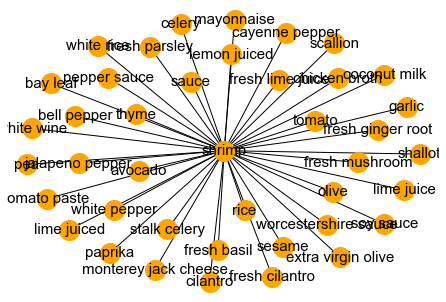

In [113]:
import networkx as nx

ingredient = "shrimp"
df_ingredient = df.loc[[ingredient]]
 
# Transform it in a links data frame (3 columns only):
links = df_ingredient.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 5) & (links['var1'] != links['var2']) & (links['var1'] != "") & (links['var2'] != "")]
links_filtered
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)


In [114]:
    links_filtered

,var1,var2,value
8,shrimp,tomato,5.922341
13,shrimp,fresh ginger root,8.424440
26,shrimp,chicken broth,6.659913
30,shrimp,bell pepper,7.996050
31,shrimp,avocado,8.022634
32,shrimp,cilantro,5.509762
33,shrimp,sesame,8.683847
44,shrimp,extra virgin olive,7.631218
45,shrimp,monterey jack cheese,5.001286
51,shrimp,garlic,6.738288


In [115]:
from pyvis.network import Network
nt = Network("1000px", "1000px")
nt.from_nx(G)

In [116]:
nt.toggle_physics(True)
nt.show("nx.html")